In [1]:
import methods
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
file_name = '/global/cfs/cdirs/m3246/vmikuni/QNF/piplus.hdf5'
e,layer_energies = methods.DataLoaderCaloGAN(file_name)
gaussian_toy = np.random.normal(0.5,1.0,size=100000)

(array([ 9888.,  9844.,  9901., 10177., 10177., 10035.,  9978.,  9949.,
        10132.,  9919.]),
 array([0.01000172, 0.10900088, 0.20800003, 0.30699918, 0.40599835,
        0.50499749, 0.60399663, 0.70299578, 0.80199498, 0.90099412,
        0.99999326]),
 <BarContainer object of 10 artists>)

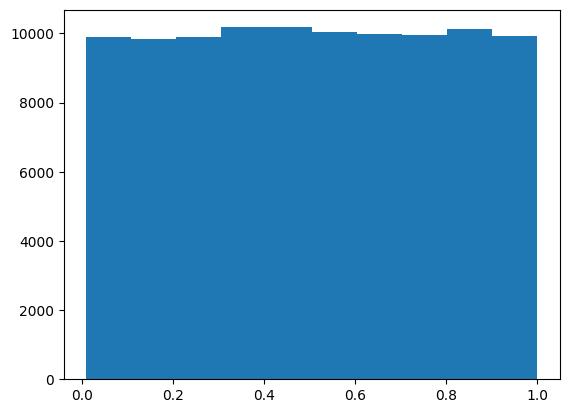

In [3]:
plt.hist(e,bins=10)

(array([4.2000e+01, 6.3200e+02, 5.3990e+03, 2.0418e+04, 3.4891e+04,
        2.7272e+04, 9.6990e+03, 1.5390e+03, 1.0500e+02, 3.0000e+00]),
 array([-3.81382064, -2.89450216, -1.97518367, -1.05586518, -0.1365467 ,
         0.78277179,  1.70209028,  2.62140876,  3.54072725,  4.46004574,
         5.37936423]),
 <BarContainer object of 10 artists>)

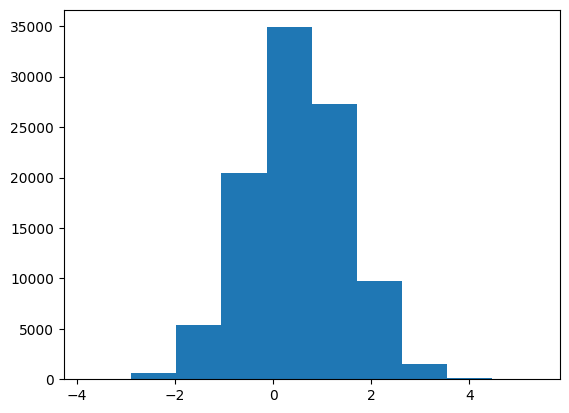

In [4]:
plt.hist(gaussian_toy)

In [5]:
model,dist = methods.MADE_no_cond(1,4)

In [6]:
batch_size = 128
myhistory = model.fit(gaussian_toy,
                        y=np.ones((len(gaussian_toy),0), dtype=np.float32), #dummy labels                                                                                                                                   
                        batch_size=batch_size,
                        epochs=20,
                        verbose = 1)

Epoch 1/10
782/782 [==============================] - 6s 4ms/step - loss: 1.4219
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4201
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4201
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4201
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4200
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4200
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4200
Epoch 8/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4200
Epoch 9/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4199
Epoch 10/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4200


In [7]:
output = dist.sample(gaussian_toy.shape[0]).numpy()   

(array([   31.,   388.,  3286., 13227., 28167., 30982., 17911.,  5209.,
          737.,    62.]),
 array([-3.75949574, -2.92801046, -2.09652519, -1.26504004, -0.43355483,
         0.39793038,  1.22941566,  2.06090093,  2.89238596,  3.72387123,
         4.5553565 ]),
 <BarContainer object of 10 artists>)

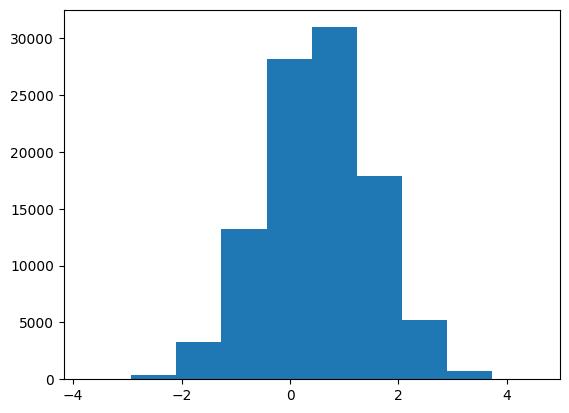

In [8]:
plt.hist(output,bins=10)

In [9]:
gaussian = dist.bijector.inverse(np.array(gaussian_toy,dtype=np.float32)[:,None]).numpy()

(array([4.2000e+01, 6.3200e+02, 5.3990e+03, 2.0418e+04, 3.4891e+04,
        2.7272e+04, 9.6990e+03, 1.5390e+03, 1.0500e+02, 3.0000e+00]),
 array([-4.35486364, -3.4315598 , -2.50825596, -1.58495212, -0.66164827,
         0.26165557,  1.18495941,  2.10826325,  3.0315671 ,  3.95487094,
         4.87817478]),
 <BarContainer object of 10 artists>)

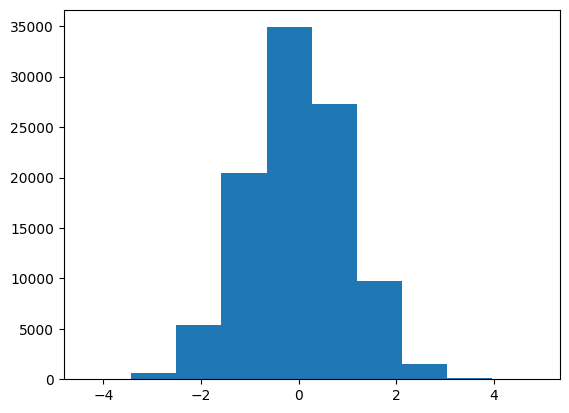

In [10]:
plt.hist(gaussian,bins=10)

In [11]:
uniform = norm.cdf(gaussian)

(array([10662., 10301., 10284.,  9939., 10179.,  9728.,  9798.,  9594.,
         9923.,  9592.]),
 array([6.65748871e-06, 1.00005938e-01, 2.00005219e-01, 3.00004500e-01,
        4.00003780e-01, 5.00003061e-01, 6.00002342e-01, 7.00001622e-01,
        8.00000903e-01, 9.00000184e-01, 9.99999465e-01]),
 <BarContainer object of 10 artists>)

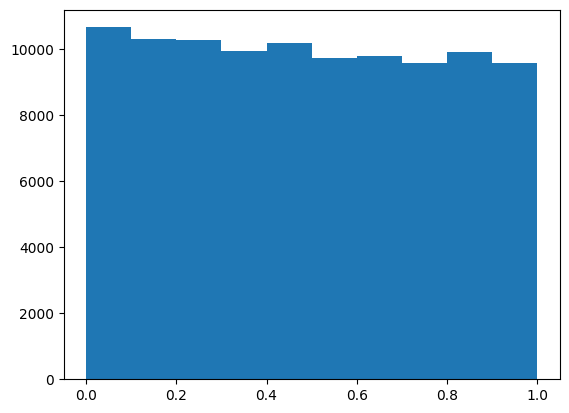

In [12]:
plt.hist(uniform,bins=10)

In [13]:
model,dist = methods.MADE(e.shape[1],layer_energies.shape[1],4)

In [14]:
batch_size = 128
#Will train with logit transformation to enforce the sharp boundary
myhistory = model.fit([methods.logit(e),layer_energies],
                    y=np.ones((len(e),0), dtype=np.float32), #dummy labels                                                                                                                                   
                    batch_size=batch_size,
                    epochs=200,
                    verbose = 1)

Epoch 1/200
782/782 [==============================] - 7s 5ms/step - loss: 1.8870
Epoch 2/200
782/782 [==============================] - 4s 5ms/step - loss: 1.7991
Epoch 3/200
782/782 [==============================] - 4s 5ms/step - loss: 1.7857
Epoch 4/200
782/782 [==============================] - 4s 5ms/step - loss: 1.7725
Epoch 5/200
782/782 [==============================] - 4s 5ms/step - loss: 1.7529
Epoch 6/200
782/782 [==============================] - 4s 5ms/step - loss: 1.7362
Epoch 7/200
782/782 [==============================] - 4s 5ms/step - loss: 1.7103
Epoch 8/200
782/782 [==============================] - 4s 5ms/step - loss: 1.6824
Epoch 9/200
782/782 [==============================] - 4s 5ms/step - loss: 1.6685
Epoch 10/200
782/782 [==============================] - 4s 5ms/step - loss: 1.6620
Epoch 11/200
782/782 [==============================] - 4s 5ms/step - loss: 1.6574
Epoch 12/200
782/782 [==============================] - 4s 5ms/step - loss: 1.6539
Epoch 13/200


In [15]:
bijector_kwargs = methods.make_bijector_kwargs(
                dist.bijector, {'made.': {'conditional_input': layer_energies}})
output = dist.sample(layer_energies.shape[0], bijector_kwargs=bijector_kwargs).numpy() 
output = methods.revert_logit(output) #Undo the logit transformation

(array([ 8929., 10381.,  9676.,  9391.,  9002.,  9241.,  9562., 10323.,
        11572., 11923.]),
 array([1.36082250e-04, 1.00086972e-01, 2.00037867e-01, 2.99988747e-01,
        3.99939656e-01, 4.99890536e-01, 5.99841416e-01, 6.99792325e-01,
        7.99743235e-01, 8.99694085e-01, 9.99644995e-01]),
 <BarContainer object of 10 artists>)

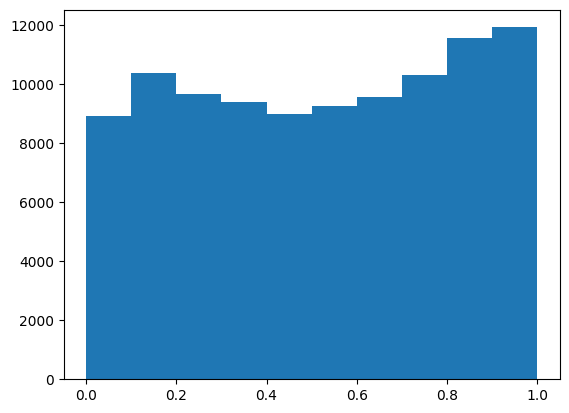

In [16]:
plt.hist(output,bins=10)

In [17]:
gaussian = dist.bijector.inverse(methods.logit(e),**bijector_kwargs).numpy()

(array([6.2890e+03, 7.0123e+04, 2.0705e+04, 2.4350e+03, 3.5300e+02,
        7.3000e+01, 1.7000e+01, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-2.86110806, -1.19123805,  0.47863197,  2.14850187,  3.81837201,
         5.48824215,  7.15811205,  8.82798195, 10.49785233, 12.16772175,
        13.83759212]),
 <BarContainer object of 10 artists>)

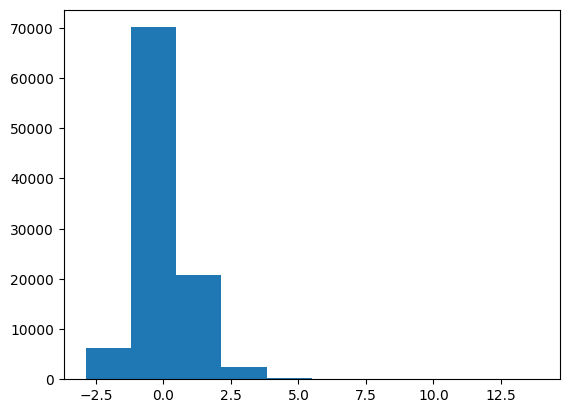

In [18]:
plt.hist(gaussian,bins=10)

In [19]:
uniform = norm.cdf(gaussian)

(array([ 5195., 10856., 15985., 14980., 12174., 10052.,  8516.,  7178.,
         6574.,  8490.]),
 array([0.00211082, 0.10189973, 0.20168865, 0.30147757, 0.40126649,
        0.50105541, 0.60084433, 0.70063324, 0.80042216, 0.90021108,
        1.        ]),
 <BarContainer object of 10 artists>)

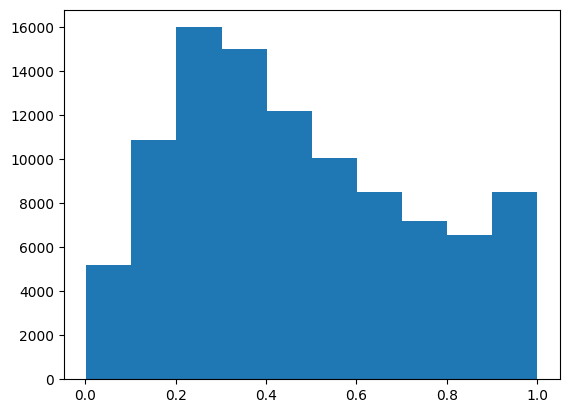

In [20]:
plt.hist(uniform,bins=10)